In [1]:
#Importing dependencies and libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model,Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data_dir = 'Fruits_Vegetables/train'
test_dir = 'Fruits_Vegetables/test'
val_dir = 'Fruits_Vegetables/validation'

In [4]:
#Setting the image into fixed height and width

In [5]:
img_width=180
img_height=180

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [8]:
data_train.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [34]:
data_cat=data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [10]:
data_val =tf.keras.utils.image_dataset_from_directory(val_dir,
                                                       image_size=(img_height,img_width),
                                                       batch_size = 32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                       image_size =(img_height,img_width),
                                                       batch_size =32,
                                                       shuffle = False,
                                                       validation_split = False)

Found 359 files belonging to 36 classes.


In [22]:
data_test.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
data_test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
# Designing the architecture of the model

In [59]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(62,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [20]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [21]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 430ms/step - accuracy: 0.0862 - loss: 3.5149 - val_accuracy: 0.3476 - val_loss: 2.3111
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 398ms/step - accuracy: 0.2912 - loss: 2.4341 - val_accuracy: 0.6268 - val_loss: 1.4813
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 381ms/step - accuracy: 0.4751 - loss: 1.8387 - val_accuracy: 0.7464 - val_loss: 0.9949
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.6616 - loss: 1.2347 - val_accuracy: 0.8604 - val_loss: 0.5736
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 343ms/step - accuracy: 0.7994 - loss: 0.7278 - val_accuracy: 0.8974 - val_loss: 0.5286
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - accuracy: 0.8743 - loss: 0.4385 - val_accuracy: 0.9202 - val_loss: 0.4148
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 397ms/step - accuracy: 0.9303 - loss: 0.2703 - val_accuracy: 0.9402 - val_loss: 0.3909
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 394ms/step - accuracy: 0.9470 - loss: 0.2374 - val_accu

In [23]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 62)          │          17,918 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 62)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30008)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30008)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,841,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,606,408 (44.27 MB)

 Trainable params: 3,868,802 (14.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,737,606 (29.52 MB)

In [ ]:
# visualizing our model through graphs


Text(0.5, 1.0, 'Loss')

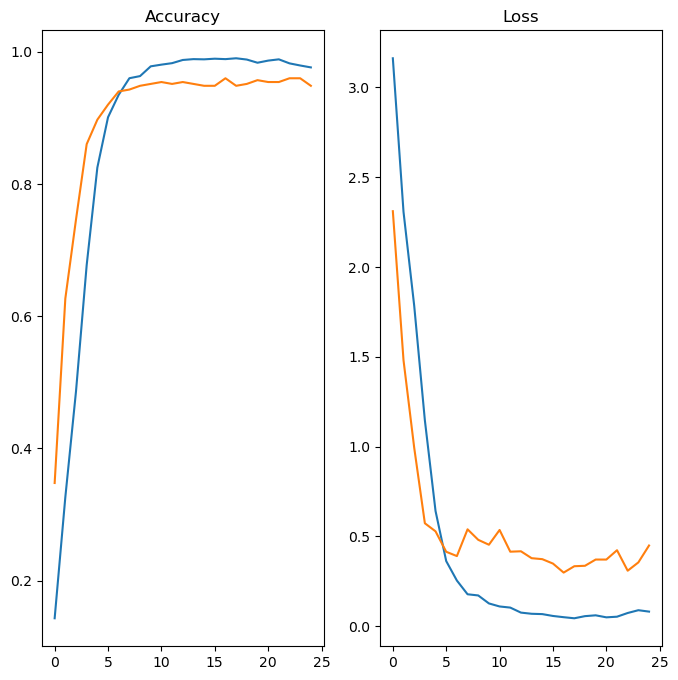

In [25]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [36]:
#Predicting the image category thorugh its image_name
image = 'cabbage.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Veg/Fruit in image is cabbage with accuracy of 92.02


In [35]:
# Saving the model
from tensorflow.keras.models import load_model
model.save('Image_classify0.keras')

In [17]:
model = load_model('Image_classify0.keras')

In [55]:
#Predicting the image category thorugh its image_name
image = 'cabbage.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Veg/Fruit in image is cabbage with accuracy of 92.02


In [54]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
target_names = data_cat
nb_samples=351
batch_size=32


predicted_labels = []
true_labels = []
for images,labels in data_test:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# #Confution Matrix and Classification Report
# Y_pred = model.predict(data_val, nb_samples // batch_size+1) # put classifier not model
# y_pred = np.argmax(Y_pred, axis=1)
# # print(y_pred)
# # print(len(y_pred))









1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [51]:
print('Confusion Matrix')
cnf_matrix=confusion_matrix(true_labels, predicted_labels)
print(cnf_matrix)

# plt.figure(figsize=(15,15))
# plt.imshow(cnf_matrix,interpolation='nearest')
# plt.colorbar()
# tick_marks = np.arange(len(data_cat))
# _ = plt.xticks(tick_marks, data_cat, rotation=90)
# _ = plt.yticks(tick_marks, data_cat)




# print('Classification Report')

# print(classification_report(true_labels, predicted_labels, target_names=target_names))

Confusion Matrix
[[ 6  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


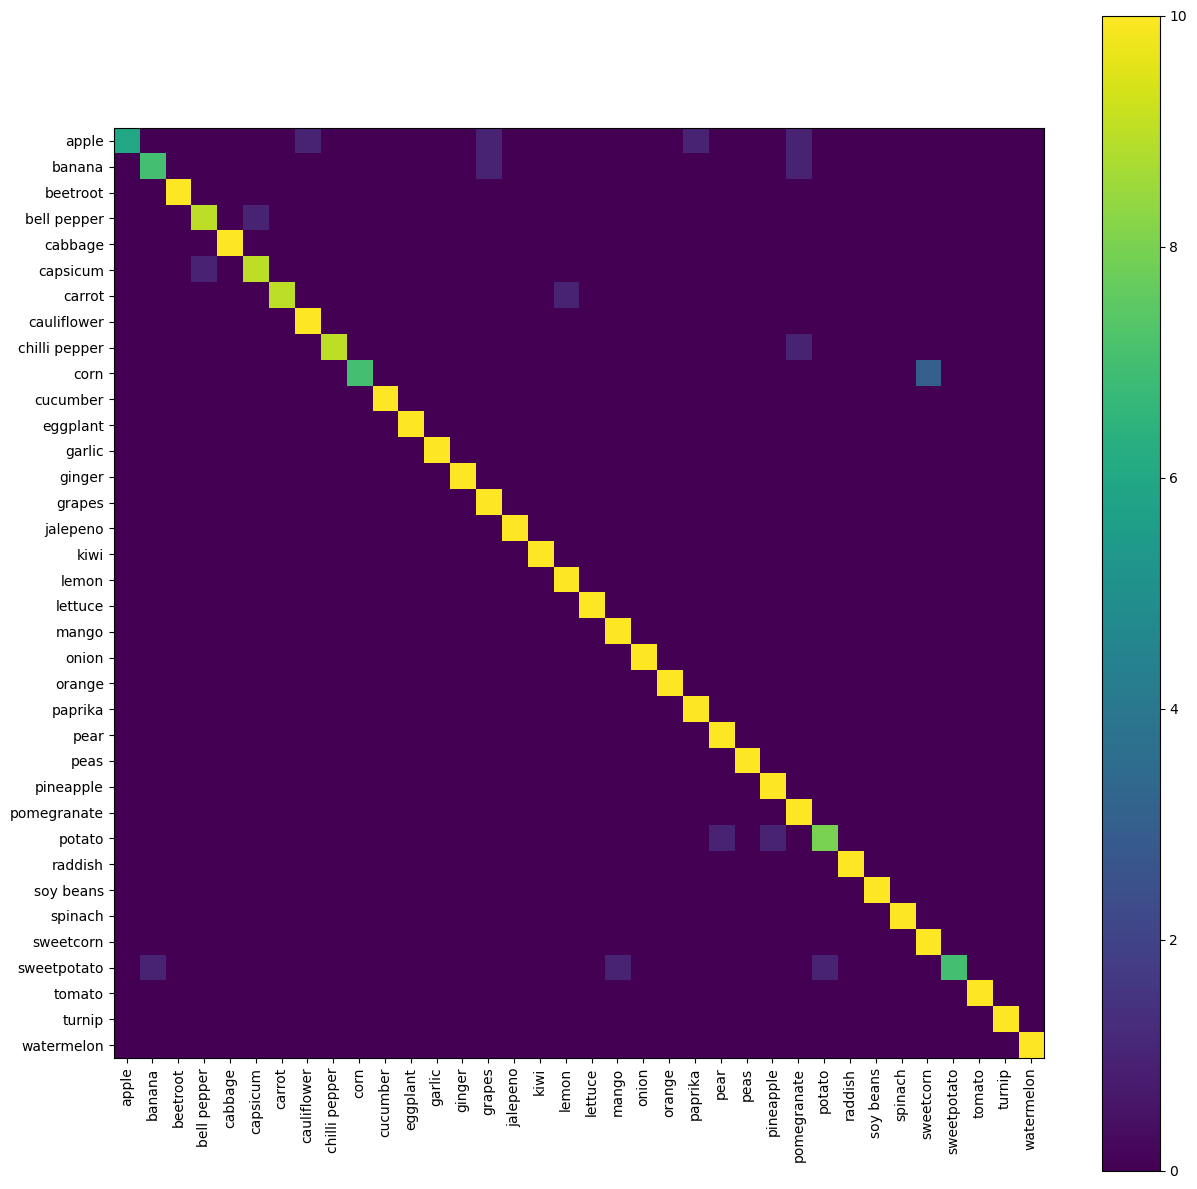

In [52]:
plt.figure(figsize=(15,15))
plt.imshow(cnf_matrix,interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(data_cat))
_ = plt.xticks(tick_marks, data_cat, rotation=90)
_ = plt.yticks(tick_marks, data_cat)

In [53]:
print('Classification Report')

print(classification_report(true_labels, predicted_labels, target_names=target_names))

Classification Report
               precision    recall  f1-score   support

        apple       1.00      0.60      0.75        10
       banana       0.88      0.78      0.82         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      0.90      0.90        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.90      0.90      0.90        10
       carrot       1.00      0.90      0.95        10
  cauliflower       0.91      1.00      0.95        10
chilli pepper       1.00      0.90      0.95        10
         corn       1.00      0.70      0.82        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       0.83      1.00      0.91        10
     jalepeno       1.00      1.00      1.00        10
         kiwi       1.00      1.00      1.

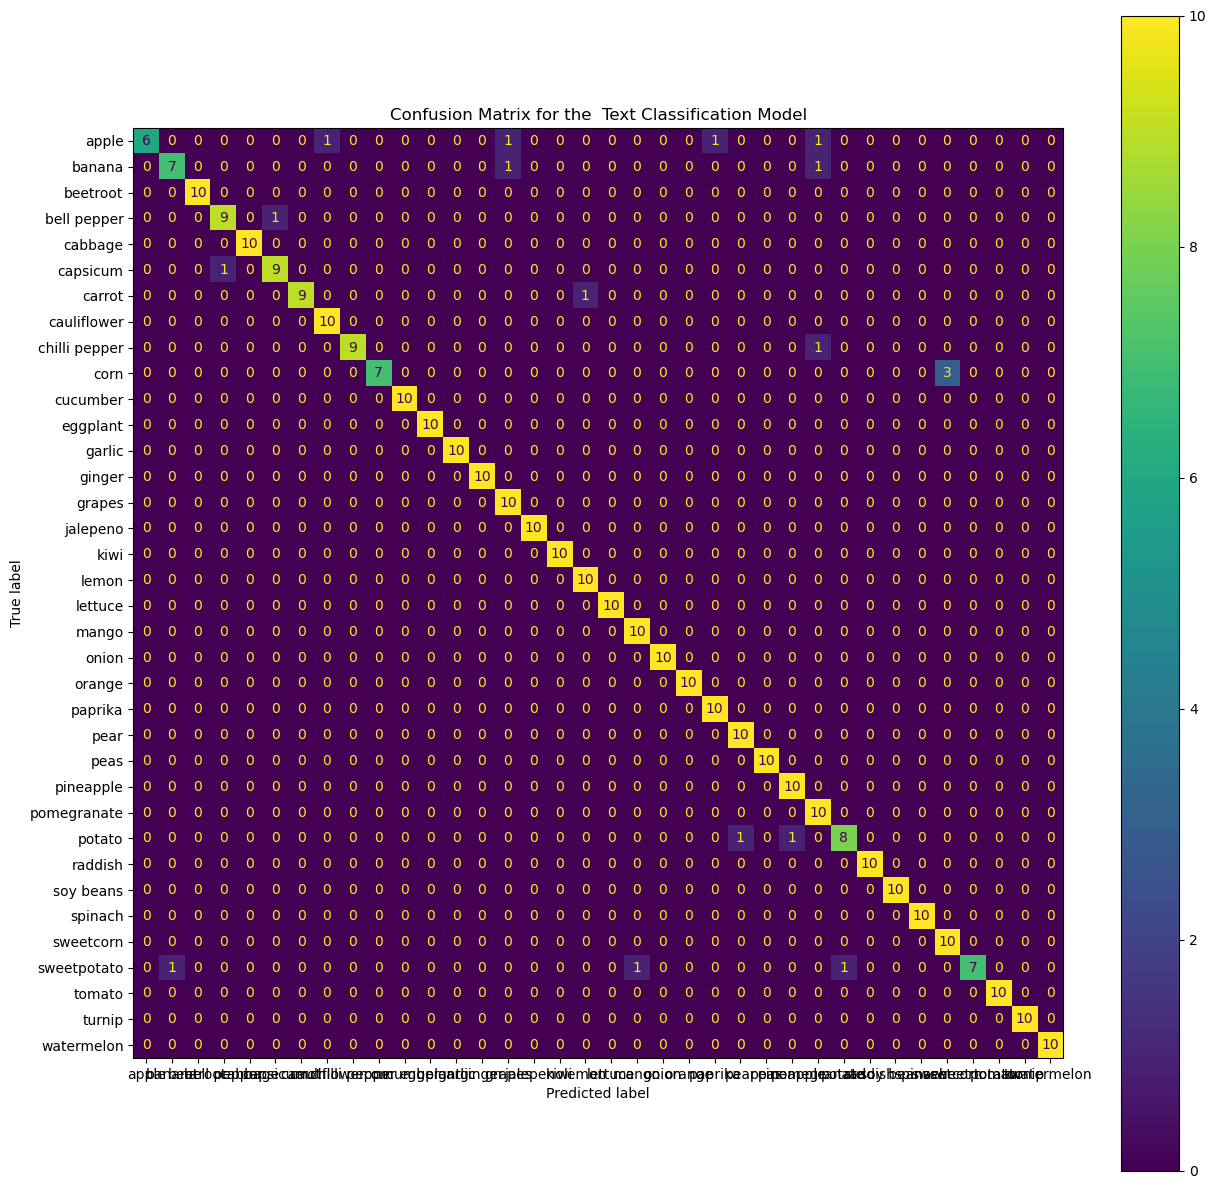

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, predicted_labels)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(15,15), dpi=100)
class_names = data_cat
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [58]:
# since there is maximum value in trace value so  model is good